In [1]:
%run Pre.py

/home/jiashen/env3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Just include full_sq and all Macro data

In [2]:
train_selected = train_f[['full_sq','timestamp']]

In [3]:
m_train = train_selected.merge(macro,on='timestamp',how='left')

In [4]:
del m_train['timestamp']

In [5]:
dtrain_m = xgb.DMatrix(m_train,label_train)
params = {
    'eta': 0.05,
    'max_depth': 6,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}

In [6]:
xgbcv = xgb.cv(params,dtrain_m,num_boost_round=1000,early_stopping_rounds=20,verbose_eval=50)
xgbcv[['train-rmse-mean', 'test-rmse-mean']].plot()

[0]	train-rmse:8.22446e+06+37589.3	test-rmse:8.2297e+06+71529
[50]	train-rmse:3.34101e+06+42202.4	test-rmse:3.75231e+06+88989.3
[100]	train-rmse:3.07399e+06+15731.6	test-rmse:3.70164e+06+111684


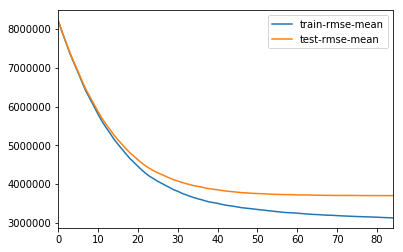

In [7]:
plt.show()

In [16]:
model = xgb.train(params,dtrain_m,num_boost_round=len(xgbcv))

In [20]:
FImportance = get_feature_importance(model).reset_index(drop=True).iloc[1:11,]

In [25]:
Extra_features = list(FImportance['Feature'])
Extra_features.append('timestamp')

In [26]:
## Try Model!
mer_train = train_f.merge(macro[Extra_features],how='left',on='timestamp')

In [27]:
mer_test = test_f.merge(macro[Extra_features],how='left',on='timestamp')

In [28]:
del mer_train['timestamp']
del mer_test['timestamp']

In [31]:
dtrain = xgb.DMatrix(mer_train,label_train)
dtest = xgb.DMatrix(mer_test)

[0]	train-rmse:8.21063e+06+36672.2	test-rmse:8.21227e+06+76102.2
[50]	train-rmse:2.72568e+06+57282.4	test-rmse:2.9609e+06+122109
[100]	train-rmse:2.3906e+06+47784.9	test-rmse:2.75607e+06+134645
[150]	train-rmse:2.26267e+06+37544.6	test-rmse:2.7029e+06+139555
[200]	train-rmse:2.17457e+06+32661.7	test-rmse:2.67315e+06+141692
[250]	train-rmse:2.10282e+06+26903.2	test-rmse:2.65337e+06+141163
[300]	train-rmse:2.04387e+06+24493.3	test-rmse:2.64338e+06+142640
[350]	train-rmse:1.99036e+06+22980	test-rmse:2.63356e+06+142749
[400]	train-rmse:1.94673e+06+20887.8	test-rmse:2.62677e+06+144120
[450]	train-rmse:1.90495e+06+19271.9	test-rmse:2.62377e+06+145486
[500]	train-rmse:1.86707e+06+19269.1	test-rmse:2.6196e+06+144844
[550]	train-rmse:1.83241e+06+19107.4	test-rmse:2.61639e+06+144686


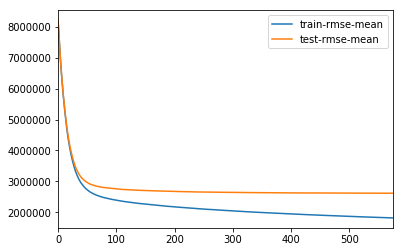

In [40]:
params = {
    'eta': 0.05,
    'max_depth': 4,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}
xgbcv = xgb.cv(params,dtrain,num_boost_round=1000,early_stopping_rounds=20,verbose_eval=50)
xgbcv[['train-rmse-mean', 'test-rmse-mean']].plot()
plt.show()

In [41]:
len(xgbcv)

576

In [42]:
model = xgb.train(params,dtrain,num_boost_round=len(xgbcv))

In [43]:
prediction = model.predict(dtest)

In [44]:
prediction

array([ 5931645. ,  8292901. ,  5629982.5, ...,  4463651.5,  5071665. ,
        8421688. ], dtype=float32)

In [45]:
test_id = test['id']
submission = pd.DataFrame({'id':test_id,'price_doc':prediction})
submission.to_csv('Submission_withmacro.csv',index=False)

In [46]:
get_feature_importance(model)

,Feature,Score
94,full_sq,942
251,life_sq,387
207,build_year,230
58,floor,220
1,max_floor,181
141,num_room,126
130,kitch_sq,102
83,micex_cbi_tr,95
97,state,85
273,railroad_km,75
